In [1]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [123]:
source('main.R')
house_prices$helpers$import_libs()

numeric_data <- 
    house_prices$helpers$load_data() %>%
    # select numeric vars
    select(house_prices$helpers$get_numeric_colnames(combined_dataset), -Id) %>%
    # drop weak numeric vars
    select(-one_of(house_prices$attributes_selection$discared_num_vars))

numeric_data %>% colnames %>% sort

[1] "BedroomAbvGr" "BsmtFinSF1"   "BsmtFullBath" "BsmtUnfSF"    "Fireplaces"  
 [6] "FullBath"     "GarageArea"   "GarageCars"   "GarageYrBlt"  "GrLivArea"   
[11] "HalfBath"     "LotArea"      "LotFrontage"  "MasVnrArea"   "MoSold"      
[16] "OpenPorchSF"  "OverallCond"  "OverallQual"  "SalePrice"    "TotalBsmtSF" 
[21] "TotRmsAbvGrd" "WoodDeckSF"   "X1stFlrSF"    "X2ndFlrSF"    "YearBuilt"   
[26] "YearRemodAdd" "YrSold"

In [122]:
best_transformation <-
    house_prices$trans$get_numeric_vars_tranformations(numeric_data)

best_transformation

var,predictor,score
BsmtUnfSF,sqrt,80.12889
GrLivArea,log,92.16162
LotArea,log,73.81288
LotFrontage,sqrt,44.25830
SalePrice,log,91.29422
TotRmsAbvGrd,log,30.73480
X1stFlrSF,log,91.16598


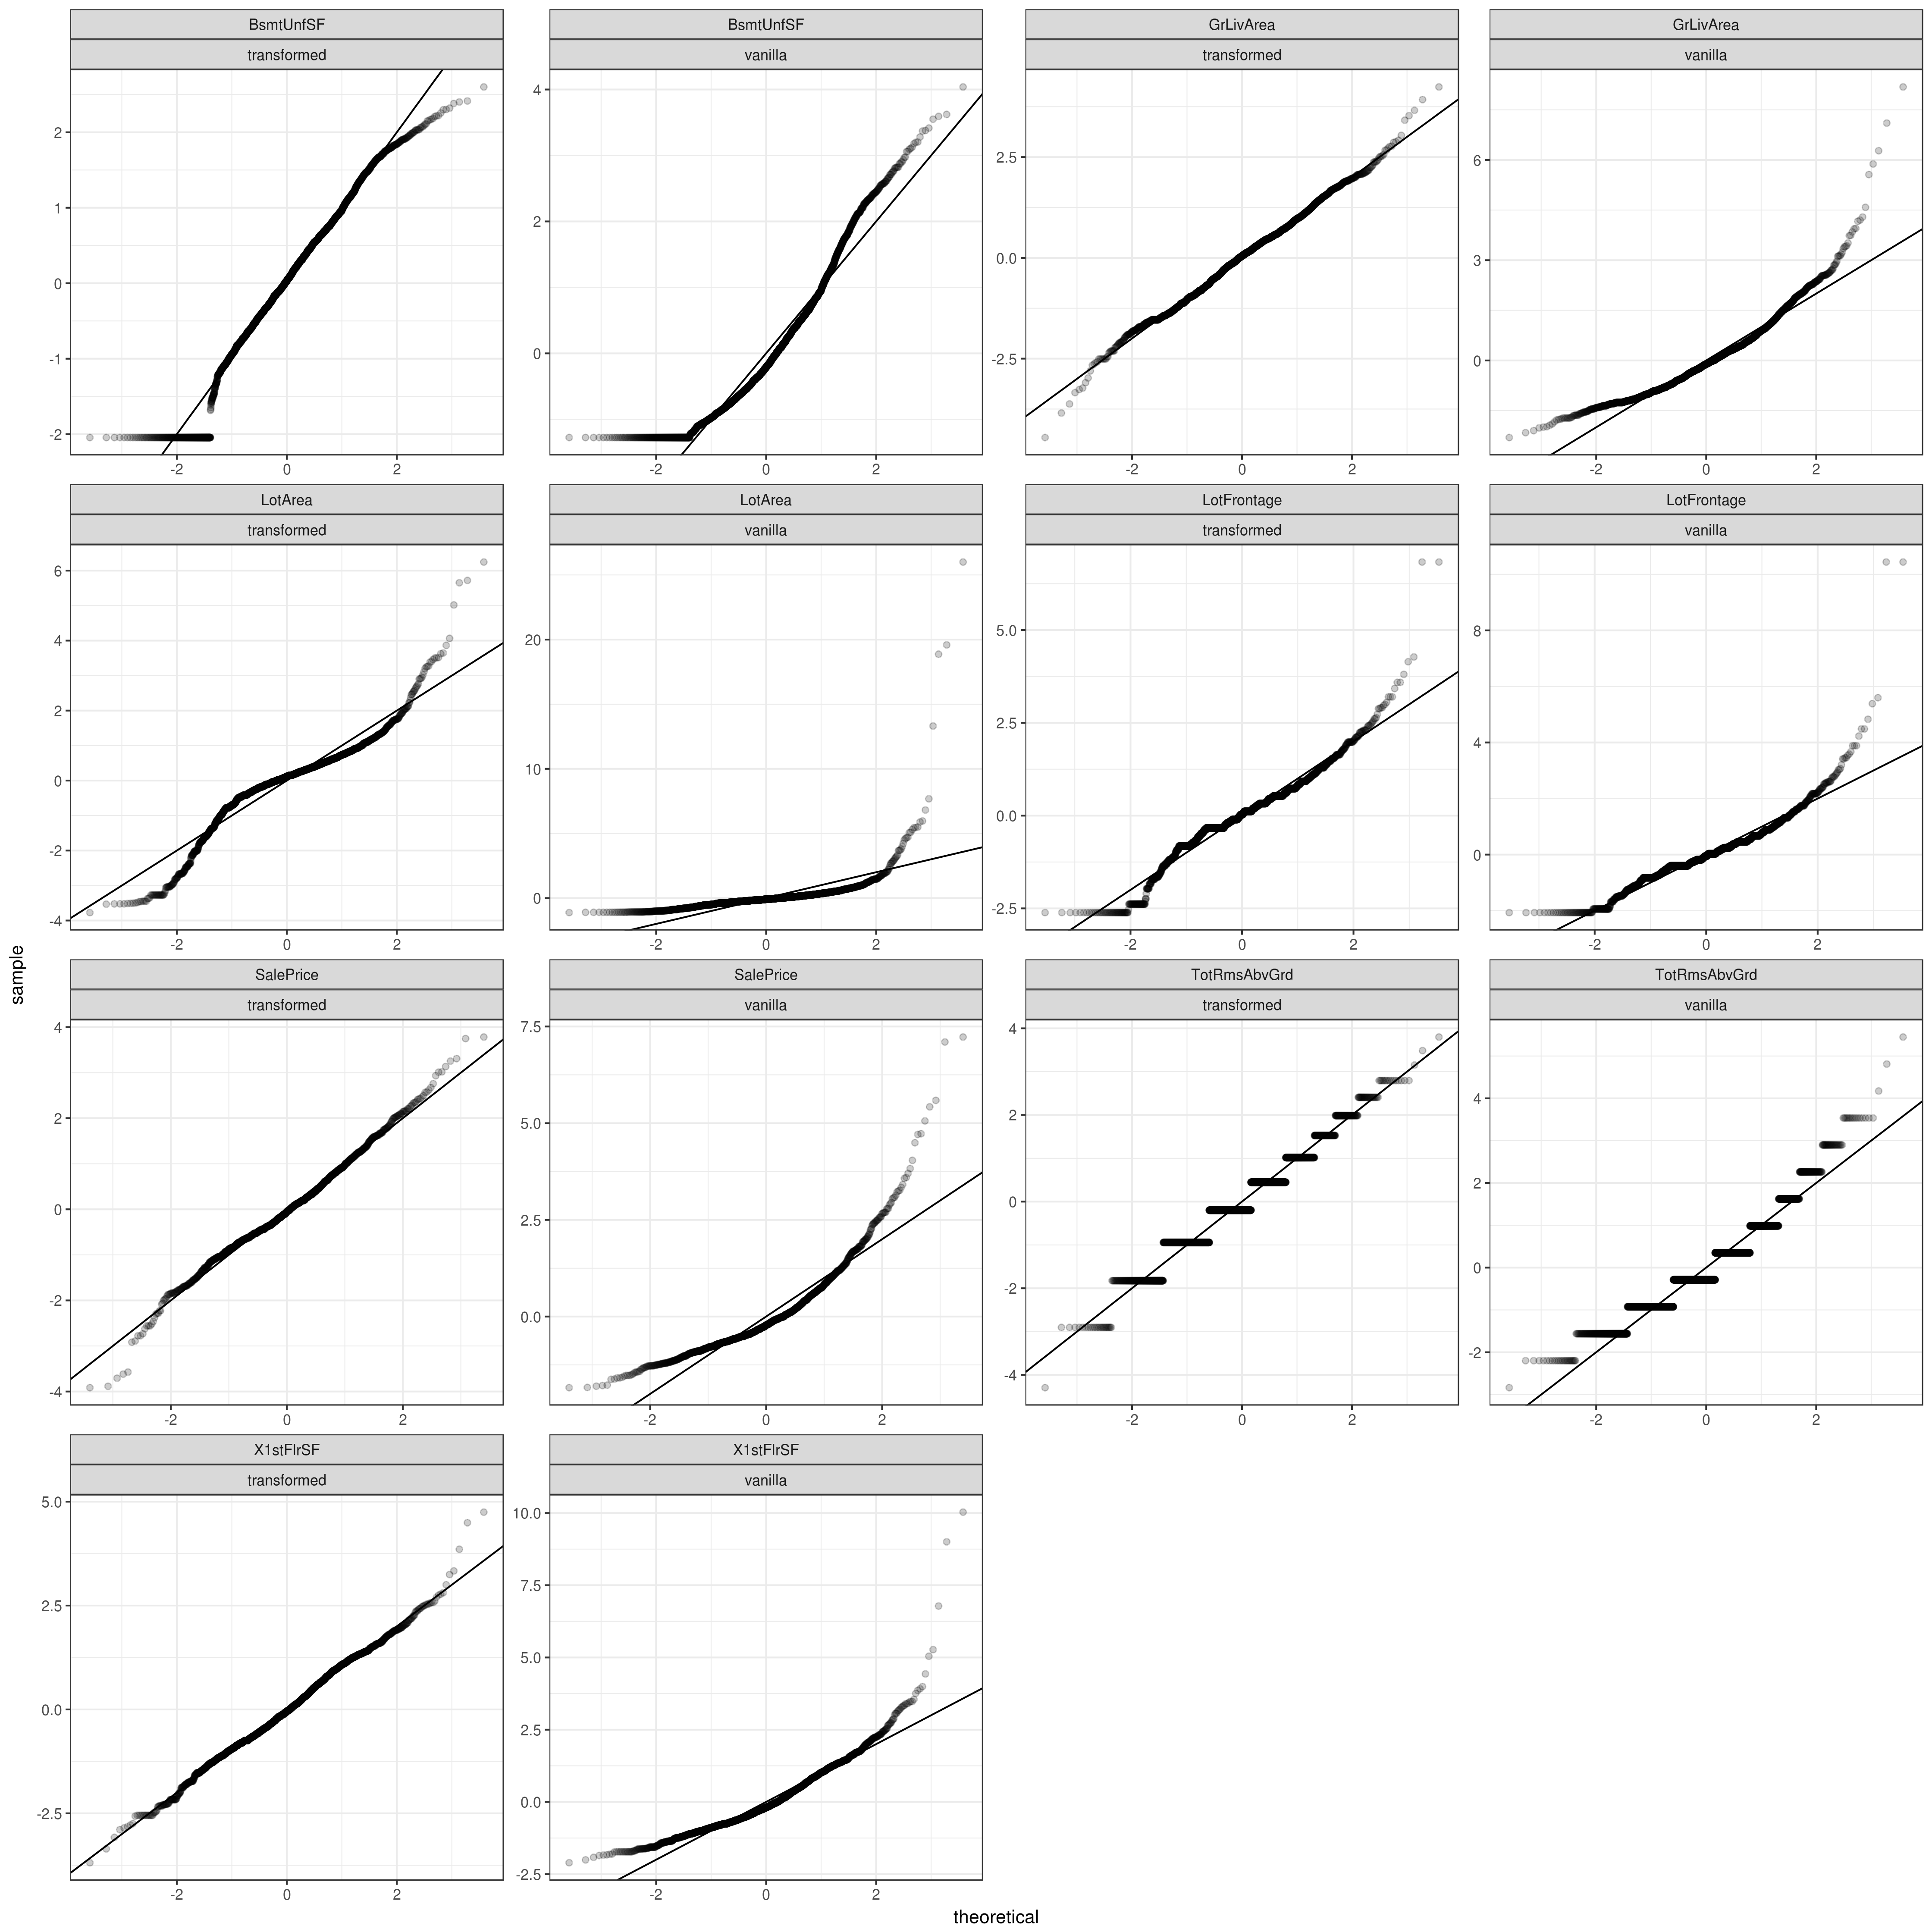

In [117]:
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res=280)

numeric_data %>%
select(one_of(best_transformation$var)) %>%
gather(var, value) %>%
filter(!is.na(value)) %>%
inner_join(best_transformation %>% select(var, predictor), by='var') %>%
mutate(
    value_transformed = recode(predictor,
        log = log(value + 1),
        sqrt = sqrt(value)
    )
) %>%
select(var, value, value_transformed) %>%
gather(tran, value, -var) %>%
mutate(
    tran = ifelse(tran == 'value', 'vanilla', 'transformed')
) %>%
group_by(var, tran) %>%
mutate(
    normed_value = (value - mean(value)) / sd(value)
) %>%
ggplot() +
geom_qq(aes(sample=normed_value), alpha=0.2) +
facet_wrap(var~tran, ncol=4, scales="free") +
geom_abline(slope=1) +
theme_bw()